In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage import transform
from skimage import util

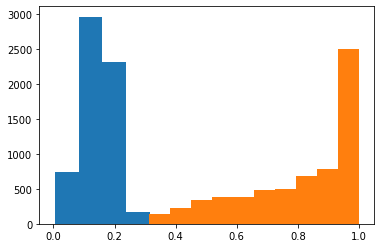

In [11]:
min_arr, max_arr = [], []

for seq in range(1, 1281):
    frames = [util.img_as_float(imread(f"../spotGEO/train/{seq}/{i}.png", as_gray=True)) for i in range(1, 6)]

    min_arr += [np.min(frame.ravel()) for frame in frames]
    max_arr += [np.max(frame.ravel()) for frame in frames]

plt.hist(min_arr)
plt.hist(max_arr)
plt.show()



In [15]:
np.save('min_arr.npy', min_arr)
np.save('max_arr.npy', max_arr)

In [19]:
print(np.min(min_arr))
print(np.argmax(min_arr)//5)

0.00392156862745098
838


In [20]:
seqid = 839

frames = [util.img_as_float(imread(f"../spotGEO/train/{seqid}/{i}.png", as_gray=True)) for i in range(1, 6)]

for frame in frames:
    print( np.min(frame.ravel()), np.max(frame.ravel()) )

0.6980392156862745 1.0
0.7529411764705882 1.0
0.7843137254901961 1.0
0.7529411764705882 1.0
0.7411764705882353 1.0


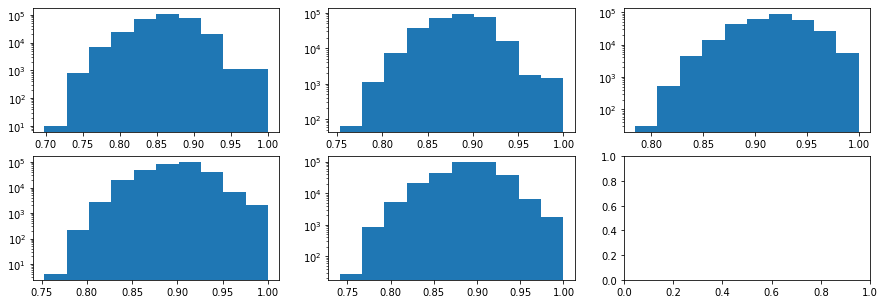

In [25]:
fig, axs = plt.subplots(2,3,figsize=(15,5))
axs = axs.ravel()

for i, frame in enumerate(frames):
    axs[i].hist(frame.ravel(), log=True)
plt.show()

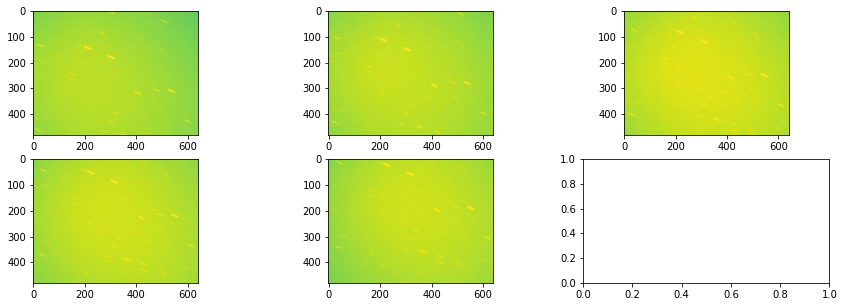

In [21]:
fig, axs = plt.subplots(2,3,figsize=(15,5))
axs = axs.ravel()

for i, frame in enumerate(frames):
    axs[i].imshow(frame, vmin=0, vmax=1)
plt.show()

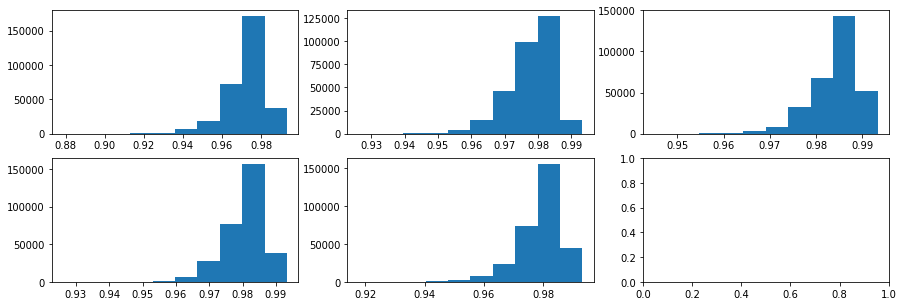

In [28]:
from skimage import exposure

fig, axs = plt.subplots(2,3,figsize=(15,5))
axs = axs.ravel()

for i, frame in enumerate(frames):
    # axs[i].imshow(exposure.rescale_intensity(frame), vmin=0, vmax=1)
    frame_adj = exposure.adjust_sigmoid(frame)
    
    # axs[i].imshow(frame_adj, vmin=0, vmax=1)
    axs[i].hist(frame_adj.ravel())
plt.show()